In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
import pandas as pd
from astropy.io import ascii
import scipy.stats as stats
import requests
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
allStars = pd.read_csv("dr25_stellar_berger2020.txt")
cleanStars = pd.read_csv("dr25_stellar_berger2020_clean_FGKM.txt")

In [3]:
mSun = 4.77
def set_parameters(stellarCatalog):
    # compute the absolute magnitudes from distance
    stellarCatalog['absoluteKepmag_DR25'] = stellarCatalog.kepmag - 5 * np.log10(stellarCatalog.dist_DR25/10);
    stellarCatalog['absoluteKepmag'] = stellarCatalog.kepmag - 5 * np.log10(stellarCatalog.dist/10);
    
    stellarCatalog['absoluteFlux_DR25'] = 10**((mSun - stellarCatalog.absoluteKepmag_DR25)/2.5);
    stellarCatalog['absoluteFlux'] = 10**((mSun - stellarCatalog.absoluteKepmag)/2.5);
    
    # compute the colors that match the effective temperatures (use Berger)
    teffColors = pd.read_csv("teffColorTable.txt", delim_whitespace=True, comment='#', dtype={"bitcode":object})
    teffColors = teffColors[teffColors.type=="2deg"]
    # interpolate teff onto RGB
    stellarCatalog["teffR"] = np.interp(stellarCatalog.teff, teffColors.temp, teffColors.R)
    stellarCatalog["teffG"] = np.interp(stellarCatalog.teff, teffColors.temp, teffColors.G)
    stellarCatalog["teffB"] = np.interp(stellarCatalog.teff, teffColors.temp, teffColors.B)
    
    # remove problem stars
    stellarCatalog = stellarCatalog[stellarCatalog.absoluteFlux_DR25 > 0]
    
    return stellarCatalog

In [4]:
allStars = set_parameters(allStars)
cleanStars = set_parameters(cleanStars)

/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
list(allStars)

['kepid',
 'tm_designation',
 'teff',
 'teff_err1',
 'teff_err2',
 'logg',
 'logg_err1',
 'logg_err2',
 'feh',
 'feh_err1',
 'feh_err2',
 'mass',
 'mass_err1',
 'mass_err2',
 'radius',
 'radius_err1',
 'radius_err2',
 'dens',
 'dens_err1',
 'dens_err2',
 'prov_sec',
 'kepmag',
 'limbdark_coeff1',
 'limbdark_coeff2',
 'limbdark_coeff3',
 'limbdark_coeff4',
 'dist',
 'dist_err1',
 'dist_err2',
 'nconfp',
 'nkoi',
 'ntce',
 'datalink_dvr',
 'st_delivname',
 'st_vet_date_str',
 'ra',
 'dec',
 'st_quarters',
 'teff_prov',
 'logg_prov',
 'feh_prov',
 'jmag',
 'jmag_err',
 'hmag',
 'hmag_err',
 'kmag',
 'kmag_err',
 'dutycycle',
 'dataspan',
 'mesthres01p5',
 'mesthres02p0',
 'mesthres02p5',
 'mesthres03p0',
 'mesthres03p5',
 'mesthres04p5',
 'mesthres05p0',
 'mesthres06p0',
 'mesthres07p5',
 'mesthres09p0',
 'mesthres10p5',
 'mesthres12p0',
 'mesthres12p5',
 'mesthres15p0',
 'rrmscdpp01p5',
 'rrmscdpp02p0',
 'rrmscdpp02p5',
 'rrmscdpp03p0',
 'rrmscdpp03p5',
 'rrmscdpp04p5',
 'rrmscdpp05p0',


In [6]:
# def draw_hr_diagram(stars, whichParameters="Berger2020"):
#     plt.style.use("dark_background")

#     plt.figure(figsize=(10,10))
#     if whichParameters == "DR25":
#         plt.scatter(stars.teff_DR25, stars.absoluteKepmag_DR25, alpha=0.8, 
#                     c = np.transpose([stars["teffR"],stars["teffG"],stars["teffB"]]), 
#                     s = stars["radius_DR25"]**2)
#         plt.title('all stars using DR25 stellar parameters');
#     elif whichParameters == "Berger2020":
#         plt.scatter(stars.teff, stars.absoluteKepmag, alpha=0.8, 
#                     c = np.transpose([stars["teffR"],stars["teffG"],stars["teffB"]]), 
#                     s = stars["radius"]**2)
#         plt.title('all stars using Berger 2020 stellar parameters');
#     else:
#         raise ValueError('Bad whichParameter');
        
#     plt.gca().invert_xaxis()
#     plt.gca().invert_yaxis()
#     xl = plt.xlim()
#     yl = plt.ylim()
#     plt.xlabel('effective temperature');
#     plt.ylabel('absolute magnitude');
    
def draw_hr_diagram(stars, whichParameters="Berger2020"):
    plt.style.use("dark_background")

    plt.figure(figsize=(13,13))
    plt.yscale("log")
    if whichParameters == "DR25":
        plt.scatter(stars.teff_DR25, stars.absoluteFlux_DR25, alpha=0.8, 
                    c = np.transpose([stars["teffR"],stars["teffG"],stars["teffB"]]), 
                    s = stars["radius_DR25"]**2)
        plt.title('stars using DR25 stellar parameters', fontsize=24);
    elif whichParameters == "Berger2020":
        plt.scatter(stars.teff, stars.absoluteFlux, alpha=0.8, 
                    c = np.transpose([stars["teffR"],stars["teffG"],stars["teffB"]]), 
                    s = stars["radius"]**2)
        plt.title('stars using Berger 2020 stellar parameters', fontsize=24);
    else:
        raise ValueError('Bad whichParameter');
    
    plt.gca().invert_xaxis()
    plt.tick_params(labelsize = 18)
    plt.xlabel('effective temperature', fontsize=24);
    plt.ylabel('intrinsic brightness (Sun = 1)', fontsize=24);

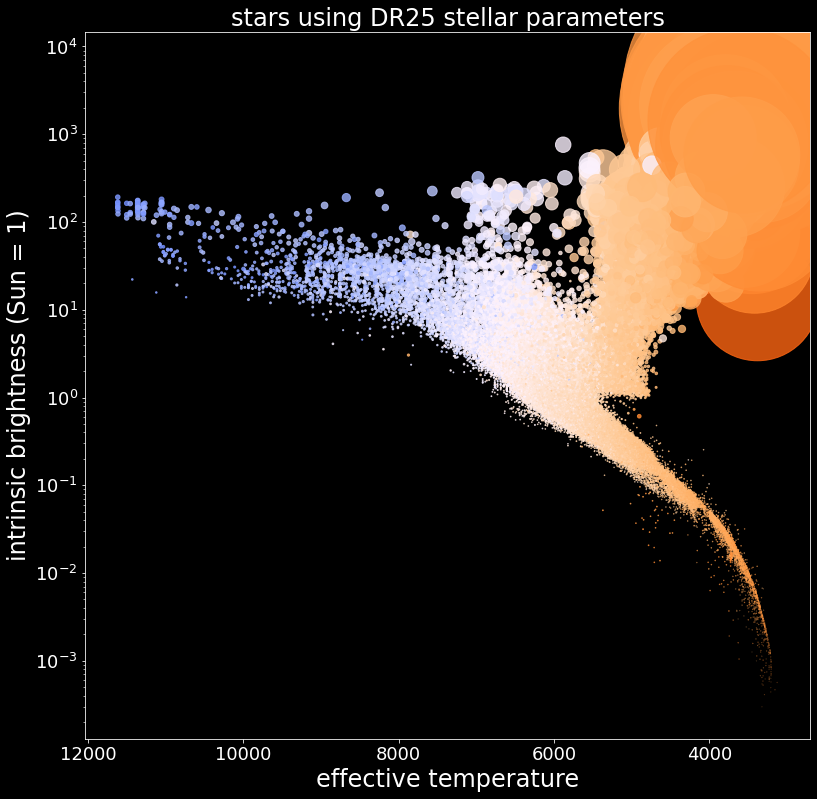

In [7]:
draw_hr_diagram(allStars, "DR25")

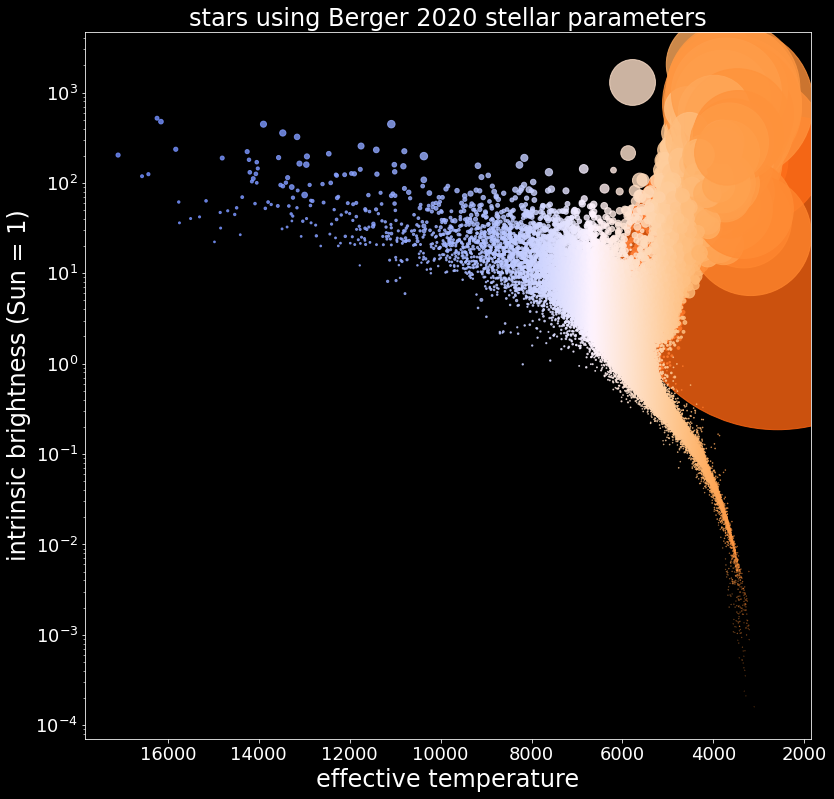

In [8]:
draw_hr_diagram(allStars, "Berger2020")

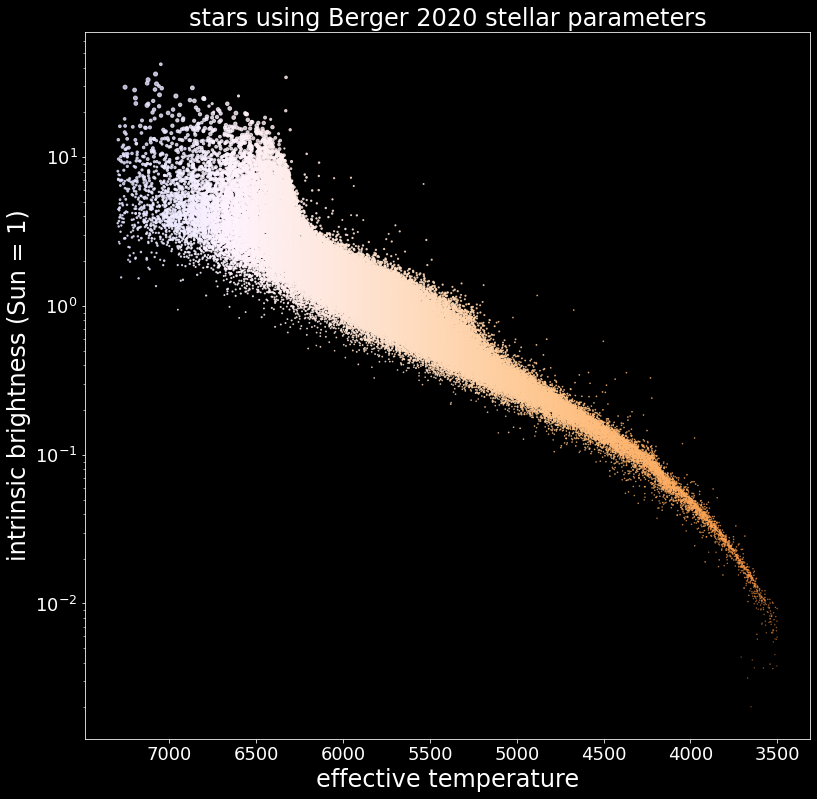

In [9]:
draw_hr_diagram(cleanStars, "Berger2020")

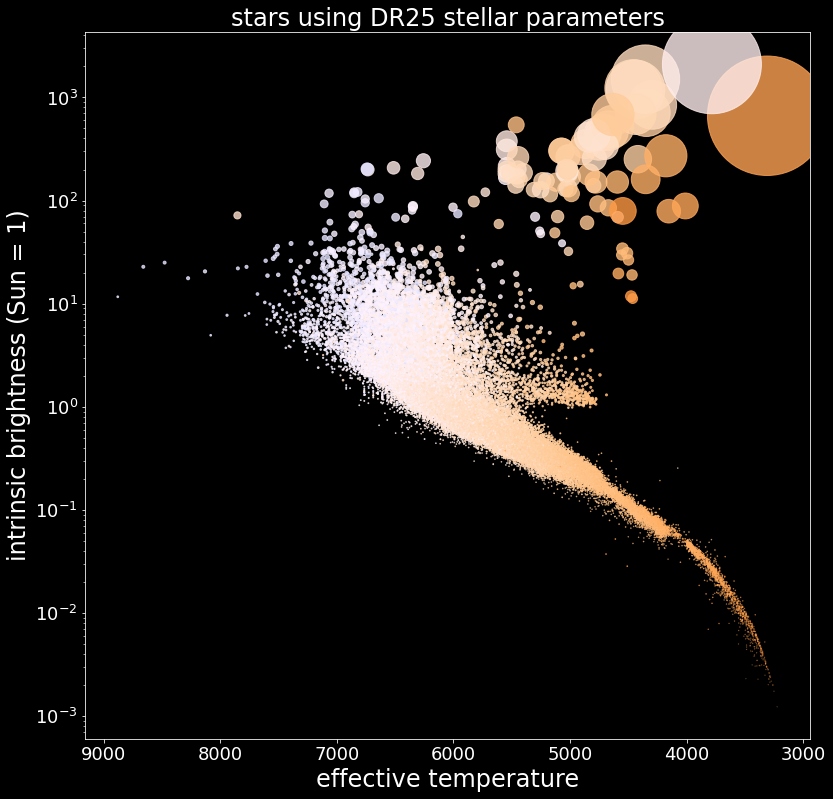

In [10]:
draw_hr_diagram(cleanStars, "DR25")

In [17]:
len(cleanStars)

81619

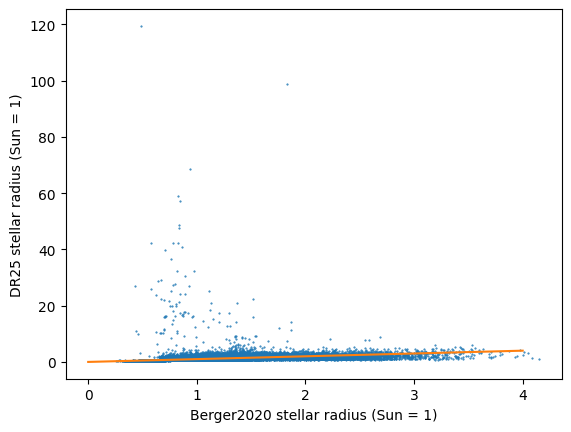

In [11]:
plt.style.use("default")

plt.plot(cleanStars.radius, cleanStars.radius_DR25, '.', markerSize=1)
plt.plot([0,4], [0,4])
plt.xlabel("Berger2020 stellar radius (Sun = 1)");
plt.ylabel("DR25 stellar radius (Sun = 1)");

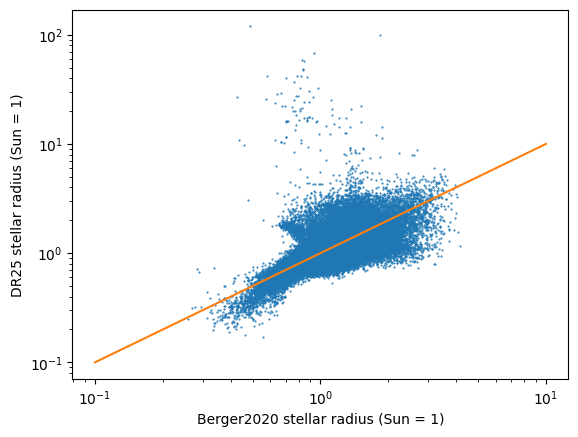

In [20]:
plt.style.use("default")

plt.loglog(cleanStars.radius, cleanStars.radius_DR25, '.', markerSize=1)
plt.loglog([1e-1, 1e1], [1e-1, 1e1])
plt.xlabel("Berger2020 stellar radius (Sun = 1)");
plt.ylabel("DR25 stellar radius (Sun = 1)");

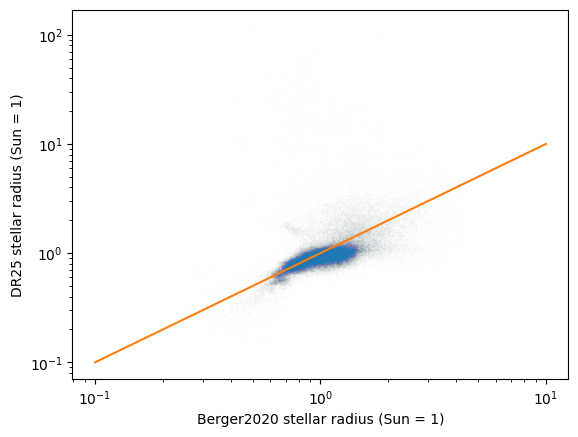

In [21]:
plt.style.use("default")

plt.loglog(cleanStars.radius, cleanStars.radius_DR25, '.', markerSize=1, alpha=0.01)
plt.loglog([1e-1, 1e1], [1e-1, 1e1])
plt.xlabel("Berger2020 stellar radius (Sun = 1)");
plt.ylabel("DR25 stellar radius (Sun = 1)");

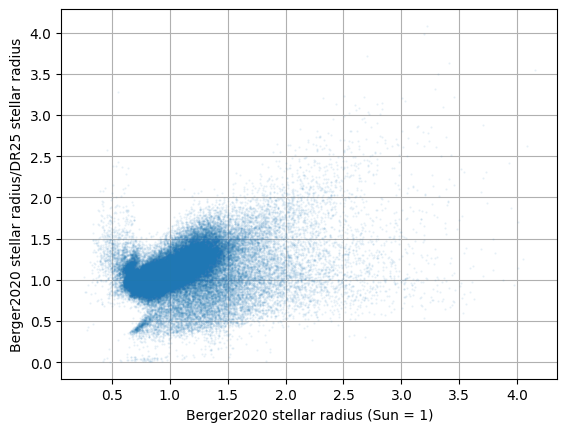

In [22]:
plt.style.use("default")

plt.plot(cleanStars.radius, cleanStars.radius/cleanStars.radius_DR25, '.', markerSize=1, alpha=0.1)
plt.grid()
plt.xlabel("Berger2020 stellar radius (Sun = 1)");
plt.ylabel("Berger2020 stellar radius/DR25 stellar radius");

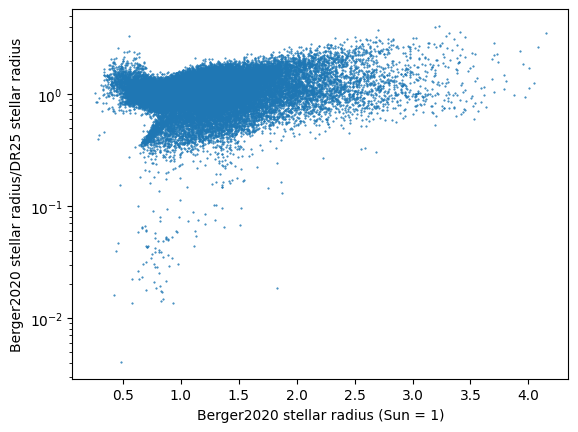

In [14]:
plt.style.use("default")

plt.semilogy(cleanStars.radius, cleanStars.radius/cleanStars.radius_DR25, '.', markerSize=1)
plt.xlabel("Berger2020 stellar radius (Sun = 1)");
plt.ylabel("Berger2020 stellar radius/DR25 stellar radius");

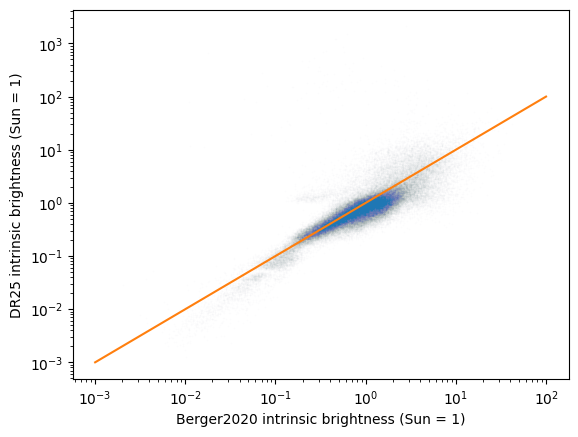

In [23]:
plt.style.use("default")

plt.loglog(cleanStars.absoluteFlux, cleanStars.absoluteFlux_DR25, '.', markerSize=1, alpha=0.01)
plt.loglog([1e-3, 1e2], [1e-3, 1e2])
plt.xlabel("Berger2020 intrinsic brightness (Sun = 1)");
plt.ylabel("DR25 intrinsic brightness (Sun = 1)");

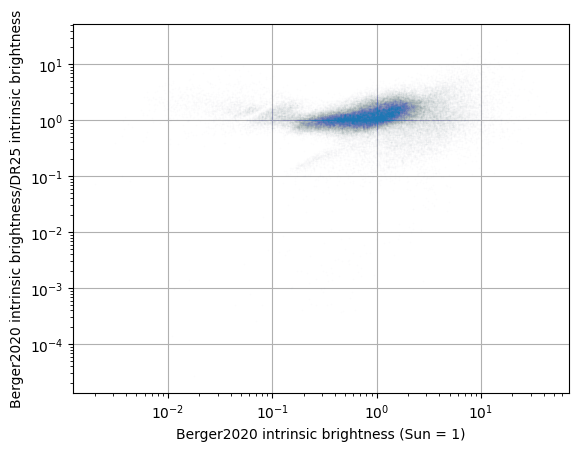

In [25]:
plt.style.use("default")

plt.loglog(cleanStars.absoluteFlux, cleanStars.absoluteFlux/cleanStars.absoluteFlux_DR25, '.', markerSize=1, alpha=0.01)
plt.grid()
plt.xlabel("Berger2020 intrinsic brightness (Sun = 1)");
plt.ylabel("Berger2020 intrinsic brightness/DR25 intrinsic brightness");